<a href="https://colab.research.google.com/github/unpackAI/CDL101/blob/main/%E7%AC%AC%E4%B8%89%E5%91%A8%EF%BC%9A%E6%8E%A8%E8%8D%90%E7%B3%BB%E7%BB%9F/03_%E6%8E%A8%E8%8D%90%E7%B3%BB%E7%BB%9F_Coursebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#💻欢迎来到DL101训练营的第三周。

## 深入了解推荐系统

推荐系统是过去几年中受到最多关注的机器学习应用之一，从TikTok的短视频推荐系统到亚马逊的产品推荐系统。

许多伟大的电子商务公司可以扩展到数十亿美元的公司，因为他们的产品核心中内置了独特的推荐系统。

本周，我们将进一步深入研究推荐系统的工作原理，以及如何构建推荐系统

##📕学习目标
* 了解不同类型的推荐系统
*了解协同过滤的潜力和局限性。
* 深入了解潜在因子和嵌入的世界。

## 📅每周进度 
|周 | 内容 | 学习目标|
|:--- |:--- | :--- |
|0 |热身与理论 |进一步了解你的同学，导师，并学习机器学习的基本概念，它是如何工作的，其局限性和潜力。
|1 |计算机视觉 |深入了解计算机视觉，并学习机器如何从视觉数据中获得洞察力并进行预测。通过收集自己的图像和训练自己的模型，建立自己的计算机视觉应用。
|2 |表格数据 |了解人工智能和机器学习如何应用于表格数据，如销售、营销或客户数据，并学习如何推导出对未来可操作的见解，并建立自己的分类或回归应用。
|**3** |**推荐系统** | **了解更多关于推荐系统的信息，并了解TikTok、Youtube和Netflix是如何向你推荐下一个喜欢的内容的。选择一个数据集，建立你自己的模型来预测和推荐。**
|4 |自然语言处理（NLP）| 将人工智能和机器学习应用于文本，发现语言模型，了解人工智能模型如何生成、总结和分类文本的过程。建立你自己的NLP应用程序，自动生成电影评论，或分析情绪。
|5 | 为你和毕业的实用人工智能 | 跳入与我们的人工智能专家的1对1辅导课程，确定一个人工智能项目，解决你的组织、个人项目或一般生活中的痛点。研究、收集反馈意见、写一篇文章并向全班介绍你的项目。成功地从训练营毕业并获得你的人工智能证书。

##推荐系统所需的库和依赖

我们将导入很多库和数据库，其中有几个库和数据库应该很熟悉。

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 4.2 MB/s 
     |████████████████████████████████| 189 kB 47.0 MB/s 
     |████████████████████████████████| 48 kB 4.1 MB/s 
     |████████████████████████████████| 1.2 MB 46.2 MB/s 
     |████████████████████████████████| 55 kB 3.2 MB/s 
     |████████████████████████████████| 558 kB 61.7 MB/s 
     |████████████████████████████████| 51 kB 261 kB/s 
     |████████████████████████████████| 130 kB 50.4 MB/s 
Mounted at /content/gdrive


需要以下几行代码来处理协同过滤的问题

In [ ]:
from fastbook import *
from fastai.collab import *
from fastai.tabular.all import *

# 推荐系统简介

推荐系统是*信息过滤系统*的一个子类，旨在预测用户对某一物品的 "评级 "或 "偏好"。有了这一点，它们就能预测与某一产品的用户有关的下一个项目。在数以千计或数以百万计的选项中，他们*过滤并找到最相关的选项。

为了实现这一目标，有三种方法已被证明是最好的结果。

1. **基于内容的过滤：**基于内容的推荐系统方法是基于物品（即电影A：主要演员、发行日期、类型等）或用户（即年龄、性别、职业等）的现有 "特征"，解释观察到的用户与物品的互动，并预测其他可能的匹配。这种方法之所以被称为基于内容的方法，是因为我们需要通过特征了解物品或用户的 "内容"。
2. **协同过滤：**推荐系统的协同过滤方法是完全基于用户和物品之间过去的互动记录，以产生新的推荐。与第一种方法相反，实际的内容和特征是不重要的。
3. **混合方法：**混合方法结合了基于内容的过滤方法和协作过滤方法的元素，以弥补任何一种方法的局限性。

<img src="https://www.dropbox.com/s/nuwtbva9tnzuayg/RSoverview.png?dl=1" alt="styletransfer" width="700"/>

在本节中，我们将进一步介绍这三种方法，以一个电影推荐系统为例，根据以前的数据，为用户提供应该看什么电影的建议。


## 基于内容的过滤

构建一个基于内容的过滤推荐系统的想法与我们专注于表格数据时学到的东西非常相似。基于我们的用户-项目互动（即什么用户看了什么电影），我们的用户资料（即年龄、性别、职业）和电影资料（即发行日期、类型、长度等），推荐问题被投射到一个分类问题（预测用户是否 "喜欢 "一部电影）或回归问题（预测用户给一部电影的评分）。

我们将能够识别特定电影的重要特征，这些特征对某一群体很重要（例如，年轻女性倾向于看恐怖电影或年轻男性倾向于看动作电影）。

<br>

我们可以采取以**用户**为中心的方法，考虑项目的特点来回答以下问题。
> *这个用户喜欢每部电影的概率是多少？*（分类问题）

> *这个用户给每部电影的排名是多少？*（回归问题）。

这意味着，只要有一个新的用户，我们就可以预测他将或不愿意看什么电影，以及他将如何评价这些电影。

<br>

我们也可以采取以**项（item）**为中心的方法，即考虑用户的特点来回答以下问题。

> *每个用户喜欢这个项目的概率是多少？*（分类问题）。

>*每个用户给这个项目的排名是多少？*（回归问题）。

这意味着只要有新电影，我们就可以预测用户会想看什么，以及他们可能会如何评价。

<br>

下面以分类问题为例说明这两种方法，并有一个示例数据集。请记住，无论哪种方法都有其权衡之处。



<img src="https://www.dropbox.com/s/c5tgvfwn89g5xrk/user%3Aitem.png?dl=1" alt="styletransfer" width="700"/>

从实际的角度来看，我们应该强调，大多数时候，收集一个用户的信息（用户不愿意回答太多的问题）比检索一个新电影的信息要困难得多（添加这些信息的人有兴趣填写这些信息，以便使他们的项目被推荐给合适的用户）。

此外，你应该记住，新用户或以前未见过的电影在逻辑上会受到内容过滤方法的影响，但一旦系统足够强大，这几乎没有机会发生。

到目前为止，应该已经很清楚，内容过滤方法严重依赖其特征（像任何表格数据问题）。此外，为了使其发挥作用，必须进行大量的数据预处理，如去除缺失数据等。

下面的方法并不严重依赖所定义的特征，而且对有缺失值也完全没有问题。我们将在下文中解释这个方法的原理。

## 协同过滤

当用协作过滤的方法来处理同样的推荐系统问题时，想法要简单得多。我们不需要定义跨用户或跨功能的特征，而是简单地看看当前用户看了哪些电影或评价不错，找到其他看了或喜欢同样电影的用户，然后把其他用户看了或喜欢的新电影推荐给当前用户。因为它完全是基于过去记录的用户和物品（即电影）之间的互动来产生新的推荐，所以我们基本上构建了一个所有用户和电影的网络，并可以根据用户与其他用户的相似性来聚类并正确假设用户的偏好。

例如，在Netflix上，你可能看了很多科幻、充满动作的电影，而且是在1970年代制作的。Netflix可能不知道你所看的电影的这些具体特征，但它能够看到其他看过你所看的相同电影的人也倾向于看其他科幻、充满动作的电影，而且是在1970年代制作的。换句话说，要使用这种方法，我们不一定需要知道关于电影的任何事情，除了谁喜欢看电影。

协作式方法的主要优点是它们不需要关于用户或物品的信息，因此，它们可以在许多情况下使用。此外，用户与物品的互动越多，新的推荐就越准确：对于一组固定的用户和物品，随着时间的推移，新的互动记录会带来新的信息，使系统越来越有效。

<img src="https://www.dropbox.com/s/y0acyg1v5g7hcdo/netflixrecommender.png?dl=1" alt="styletransfer" width="700"/>

然而，由于它只考虑过去的互动来进行推荐，协同过滤受到**"冷启动问题 "**的困扰：它不可能向新用户推荐任何东西或向任何用户推荐一个新项目，许多用户或项目的互动太少，无法有效处理。这个缺点可以通过不同的方式解决。
* 向新用户推荐随机项目或向随机用户推荐新项目（随机策略）。
* 向新用户推荐热门项目或向最活跃的用户推荐新项目（最大期望值策略）。
* 向新用户推荐一组不同的项目，或向一组不同的用户推荐新项目（探索性策略）。

## 混合方法

混合方法结合了协作过滤和基于内容的方法，以达到最先进的效果。因此，它们是如今你会遇到的大规模推荐系统的类型。这种混合方法主要有两种形式：我们可以独立训练两个模型（一个协作过滤模型和一个基于内容的模型），然后结合它们的建议，或者直接建立一个单一的模型（通常是一个神经网络），通过使用先验信息（关于用户和/或项目）以及 "协作 "互动信息作为输入，将两种方法统一起来。

本周，我们将使用协作过滤的方法建立一个电影推荐系统，并带领大家了解关键的方面和概念。

## 协作过滤工作流程

让我们讨论一下如何通过迭代机器学习工作流程来建立推荐系统，这是我们开发机器学习应用程序的黄金方法。

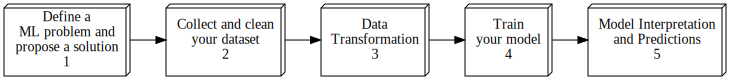

In [ ]:
gv('''ordering=in
problem[shape=box3d width=1 height=1 label="Define a \n ML problem and \n propose a solution\n1"]
dataset[shape=box3d width=1 height=1 label="Collect and clean \n your dataset\n2"]
transform[shape=box3d width=1 height=1 label="Data\n Transformation\n3"]
train[shape=box3d width=1 height=1 label="Train \n your model\n4"]
predict[shape=box3d width=1 height=1 label="Model Interpretation \n and Predictions\n5"]
problem->dataset->transform->train->predict''')

1. ***定义一个ML问题并提出解决方案：***定义你打算研究的推荐系统问题。你的项目是什么，你的用户是谁？定义你是采取基于内容的方法还是协作过滤的方法，并开始定义你的解决方案的建议模型。

2. ***收集和构建你的数据集：***准备好你的数据-项目交互矩阵。


3. ***数据转换：***建立你的数据加载器。


4. ***训练你的模型：***开始训练，定义 "y_range"，"n_factors "和你的性能 "metrics"。

5. ***解释模型并进行预测：***深入研究结果，了解定义的潜在因素和嵌入物。使用模型来进行预测。

# 建立一个协同过滤模型

## 1. 定义一个机器学习问题并提出一个解决方案

## 2. 构建数据集

我们无法访问Netflix的整个观影历史数据集，但有一个很好的数据集我们可以使用，叫做[MovieLens](https://grouplens.org/datasets/movielens/)。这个数据集包含了数以千万计的电影排名（电影ID、用户ID和数字评分的组合），尽管我们将只使用其中的10万条数据的子集作为例子。如果你有兴趣，在完整的2500万个推荐数据集上尝试和复制这种方法将是一个很好的学习项目，你可以从他们的网站上获得。

该数据集可通过通常的fastai功能获得。

In [ ]:
path = untar_data(URLs.ML_100k)

In [ ]:
path.ls()

(#23) [Path('/root/.fastai/data/ml-100k/u.genre'),Path('/root/.fastai/data/ml-100k/u2.base'),Path('/root/.fastai/data/ml-100k/ua.test'),Path('/root/.fastai/data/ml-100k/u4.test'),Path('/root/.fastai/data/ml-100k/u3.test'),Path('/root/.fastai/data/ml-100k/allbut.pl'),Path('/root/.fastai/data/ml-100k/u3.base'),Path('/root/.fastai/data/ml-100k/u4.base'),Path('/root/.fastai/data/ml-100k/u.user'),Path('/root/.fastai/data/ml-100k/u5.base')...]

为了更好地了解我们的数据集，让我们观察一下README文件，这是一个介绍我们数据的文件。

请注意，不是每个数据集都会提供一个README文件。

In [ ]:
readme = path / 'README'
print(readme.read_text()) # "<path variable>.read_text()" will get the content of a file

SUMMARY & USAGE LICENSE

MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.
 
This data set consists of:
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	* Each user has rated at least 20 movies. 
        * Simple demographic info for the users (age, gender, occupation, zip)

The data was collected through the MovieLens web site
(movielens.umn.edu) during the seven-month period from September 19th, 
1997 through April 22nd, 1998. This data has been cleaned up - users
who had less than 20 ratings or did not have complete demographic
information were removed from this data set. Detailed descriptions of
the data file can be found at the end of this file.

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under th

通过对数据的简要描述后，我们可以看到，在其他方面我们可以访问。
* `u.data`（关于用户的电影评分信息）。
* `u.item` (关于项目（电影）的信息)。
* `u.genre` (类型的列表),
* `u.user` (关于用户的人口统计信息)和
* `u.occupation` (职业列表)。

此外，你可能已经注意到，我们正在使用一个以制表符隔开的列表。这只是意味着我们使用制表符作为数据的分隔符/分隔符，而不是逗号（CSV--逗号分隔的值）。

让我们探讨一下我们的数据。由于我们使用的是tab分隔的列表，我们将不得不把 "分隔符 "定义为"`|`"，并使用 "latin-1 "编码，将所有可能的字节值映射到前256个Unicode码位（英文字符）。

让我们从观察`u.item`开始。

In [ ]:
pd.read_csv(path/'u.item', delimiter='|', encoding='latin-1')

,1,Toy Story (1995),01-Jan-1995,Unnamed: 3,http://us.imdb.com/M/title-exact?Toy%20Story%20(1995),0,0.1,0.2,1.1,1.2,1.3,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15
0,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995),0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,6,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+waipo+qiao+(1995),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+(1997),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(1998),0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Crazy%20(1994),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


我们可以看到，我们有1681行，对应1681部电影，有24列。如果你想了解每一列的含义，你可以翻阅readme文件。

这张表看起来很乱。让我们把它变得更容易查看。为此，我们将去掉19个二进制字段，添加标题并命名每一列。

In [ ]:
movies = pd.read_csv(
    path/'u.item',  delimiter='|', encoding='latin-1',
    usecols=(0,1,2,3,4), names=('movie','title', 'release date', 'video release date', 'IMDb URL'), 
    header=None)
movies.head()

,movie,title,release date,video release date,IMDb URL
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(1995)
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


让我们对`u.user`做同样的处理。


In [ ]:
users = pd.read_csv(
    path/'u.user', delimiter='|', encoding='latin-1',
    usecols=(0,1,2,3,4), 
    names=('user id', 'age', 'gender', 'occupation', 'zip code'),
    header=None)

users.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


最后是 "u.data"，它包含我们的评级。


In [ ]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                      usecols=(0,1,2), names=['user','movie','rating'])
ratings.head()

,user,movie,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


你可能已经意识到了，但是...

**由于我们正在研究一个协作过滤模型，所有与用户或电影有关的信息都不重要，因为我们只依赖用户和电影之间的互动记录。因此，我们只需要 "u.data "文件**。

我们唯一要做的调整是将电影标题添加到现在定义的 "评分 "表中，这样可以让我们人类更容易理解我们正在看的东西。

In [ ]:
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1',
                     usecols=(0,1), names=('movie','title'), header=None)

ratings = ratings.merge(movies)  # this line adds the "title" column to the dating DataFrame
ratings.head()

,user,movie,rating,title
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)


我们也可以把它想象成我们称之为*用户-项目互动矩阵*的东西。它在上面列出所有的电影ID，在左边列出所有的用户ID。这样，我们就可以看到用户1到14对电影1到14的评价。你可以玩玩`iloc`来显示更多的结果。

例如，用户1给电影9的评分是5.0。任何显示NaN的字段都意味着用户还没有给电影评分。在基于内容的方法中，这将是一个问题。在协同过滤方法中正相反，NaN（Not a Number）完全不是问题，事实上，协同过滤模型的目标就是能够填补和预测这样的评分。

In [ ]:
print(ratings.pivot(index='user', columns='movie', values='rating').iloc[:14,:14])

movie   1    2    3    4    5    6    7    8    9    10   11   12   13   14
user                                                                       
1      5.0  3.0  4.0  3.0  3.0  5.0  4.0  1.0  5.0  3.0  2.0  5.0  5.0  5.0
2      4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  2.0  NaN  NaN  4.0  4.0
3      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN
5      4.0  3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
6      4.0  NaN  NaN  NaN  NaN  NaN  2.0  4.0  4.0  NaN  NaN  4.0  2.0  5.0
7      NaN  NaN  NaN  5.0  NaN  NaN  5.0  5.0  5.0  4.0  3.0  5.0  NaN  NaN
8      NaN  NaN  NaN  NaN  NaN  NaN  3.0  NaN  NaN  NaN  3.0  NaN  NaN  NaN
9      NaN  NaN  NaN  NaN  NaN  5.0  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
10     4.0  NaN  NaN  4.0  NaN  NaN  4.0  NaN  4.0  NaN  4.0  5.0  3.0  NaN
11     NaN  NaN  NaN  NaN  NaN  NaN  NaN  4.0  5.0  NaN  2.0  2.0  NaN  NaN
12     NaN  

⚡ 尝试理解上面的*用户-项目互动矩阵*，因为它在后面会变得更加重要。

## 3. 数据转换

然后我们可以从上面的 "评级 "表中建立一个 "DataLoaders "对象。默认情况下，它的第一列是用户，第二列是项目（这里是我们的电影），第三列是评分。我们需要改变`item_name`的值，在我们的例子中，使用标题而不是ID。

In [ ]:
dls = CollabDataLoaders.from_df(ratings, user_name='user', item_name='title', bs=64)

让我们看看在模型训练之前使用`show_batch`对我们的dataloaders`dls`的最终输入。

In [ ]:
dls.show_batch()

,user,title,rating
0,395,Flubber (1997),3
1,30,Star Wars (1977),3
2,489,Picture Perfect (1997),3
3,787,"Peacemaker, The (1997)",4
4,276,From Dusk Till Dawn (1996),4
5,354,Leaving Las Vegas (1995),3
6,861,Shadowlands (1993),4
7,264,"Brothers McMullen, The (1995)",4
8,419,"Philadelphia Story, The (1940)",5
9,222,Passion Fish (1992),2


这看起来很好! 同样，从上面我们能够观察到的所有信息来看，我们只需要用户与项目的互动数据和相应的评级。

让我们来训练我们的模型。

## 4. 模型训练

让我们使用`collab_learner`函数开始建立我们的学习器。

像往常一样，它把我们的数据载体作为一个参数。此外，我们还定义了`n_factors`、`y_range`和`metrics`。这些对我们来说都是非常关键的。

> `n_factors`。这里我们定义了潜在因素的数量。协同过滤中潜在因素的基本概念将在后面进一步解释。先别急着走!

> `y_range`。我们的y是我们的模型必须学习预测的依赖变量。在我们的例子中，它是每个用户对一部电影的评价。在训练之前，我们必须定义一个范围，在我们的例子中是从0-5（0星的排名=坏电影，5星的排名=好电影）。事实证明，有一个稍高的最大或最小值是有益的。请自由发挥吧。

>"度量"。我们选择均方根误差（RMSE）作为性能指标，因为它最容易直接解释。它基本上告诉我们我们的预测与实际数据点有多接近。该值越高，我们的预测就越偏离实际评级。RMSE的范围从0到∞。作为一个经验法则，RMSE值低于1是相当好的。

In [ ]:
learn = collab_learner(dls, n_factors=50, y_range=(0, 5.5), metrics=rmse)

让我们开始使用5个 epochs来训练我们的模型。

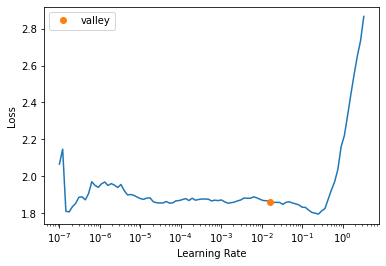

In [ ]:
lr_min = learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, lr_min, wd=0.1)

epoch,train_loss,valid_loss,_rmse,time
0,1.005174,1.008681,1.004331,00:11
1,0.966879,0.960137,0.979865,00:11
2,0.861115,0.877164,0.936571,00:11
3,0.663615,0.837190,0.914981,00:11
4,0.419341,0.837669,0.915242,00:11


作为同一数据集的基准，我们可以将自己与流行的[Librec系统](https://guoguibing.github.io/librec/index.html)的协同过滤进行比较。他们显示的最佳结果是RMSE为0.91。所以我们做得很好。

## 5. 模型解释

###该模型是如何学会 "推荐 "的？

在训练了我们自己的协同过滤模型之后，只取决于用户-项目的互动和相应的排名，现在明显的问题是。"这个模型是如何训练自己的？"。

准备好了解潜在因子（**latent-factor**）和词嵌入的概念，这不仅在协同过滤中至关重要，而且在其他应用中也是如此，如NLP（自然语言处理）。

让我们先来看看电影推荐系统的例子。

#### 潜在因子的介绍

在上面的案例中，我们现在能够非常自信地预测，根据你和其他用户以前的观看历史，你喜欢什么样的电影。现在让我们试着理解这一点是如何实现的。

假设我们想在Netflix上使用我们新开发的模型。在Netflix上，你可能已经看了很多科幻电影，充满了动作，而且是在1970年代制作的。Netflix可能不知道你所看的电影的这些特定属性，但它能够看到其他看过你所看的相同电影的人也倾向于看其他科幻、充满动作的电影，而且是在1970年代制作的。换句话说，我们的模型不需要一定要知道关于电影的任何事情，除了谁喜欢看电影。

这方面的关键基础思想是*潜在因子*。在Netflix的例子中，我们一开始就假设你喜欢老式的、充满动作的科幻电影。但你实际上从未告诉Netflix你喜欢这些类型的电影。而Netflix实际上也不需要在它的电影表中增加列，说明哪些电影是这些类型的。不过，一个人为什么喜欢一套电影而不是另一套，肯定有一些潜在的模式。模型的工作就是识别并找到这种假设的模式，使其能够做出良好的预测。

换句话说，定义电影和用户偏好的 "特征 "并没有被定义，比如*发行年份*、*流派*或*长度*（就像我们在基于内容的方法或任何其他表格数据问题中看到的那样），但这些特征是由模型学习的。因此，它们对人类来说不太透明和明显。

##### 最佳潜在因素是如何学习的？

为了找到用户和他们与物品之间的互动模式以及相应的排名。我们基本上为用户和电影创建了一个自我定义的 "特征"（称为***潜在因子***），经过训练后可以解释这些模式。

我们拥有的潜在因素越多，我们就能找到更详细的模式。然而，它也会变得越来越抽象。

让我们从一个例子开始，了解如何计算出最佳的潜在因素。下面你可以看到一部由3个潜在因素代表的电影。不要介意阵列这个词，你可以简单地把它看作是表格中的一行数据。

为了简单起见，我们只假设，我们用3个潜因作为每部电影的特征。经过训练后，这些潜在因素代表了*科幻小说*、*动作片*和*老电影*等类别。对于每一个潜在因素，我们都会在-1和+1之间专门设置一个值。数值越高，电影被潜伏因子和类别所代表的程度就越高。数字越小，代表的数量就越少。

在这种情况下，电影是*最后的天行者*。第一个潜在因素（即*科幻小说*）的数值为0.98，第二个（即*动作*）的数值为0.9，第三个（即*老电影*）的数值为-0.9。

换句话说，*最后的天行者*是一部不老的科幻和动作电影。相当准确!

记住：在现实中，潜在的因素可能不会如此清晰地对应于所定义的类别。

In [ ]:
last_skywalker = np.array([0.98,0.9,-0.9])
last_skywalker

array([ 0.98,  0.9 , -0.9 ])

让我们对一个用户做同样的事情。我们可以把一个喜欢现代科幻动作电影的用户表示为

In [ ]:
user1 = np.array([0.9,0.8,-0.6])
user1

array([ 0.9,  0.8, -0.6])

现在我们可以简单地将这两个数组相乘，得到一个结果。结果越高，电影和用户之间的匹配就越好。在模型训练期间，当建立我们的 "学习者 "时，使用 "y_range "来定义最高和最低的可能结果。

In [ ]:
(user1 * last_skywalker).sum()

2.1420000000000003

该模型所做的是，它将上面的结果与*最后的天行者*和用户1之间的实际评分进行比较。根据结果，他改变了潜在因素的值。

如果你还记得我们第00周的课程，我们了解到这正是一个模型的训练方式。比较实际值和预测值，计算损失，然后更新权重。

协同过滤的目标是尽可能的精确。然后，我们就会知道每个用户在多大程度上喜欢一部电影可能属于的每个重要类别（即科幻小说、老电影/年龄等），我们也会知道每部电影在这些类别中的程度。然后，我们可以简单地使用这些潜在的因素和它们的值来预测用户对尚未评级的电影的评价。

显然，我们有更多的用户和电影，因此我们需要对每一个用户和电影重复上述的计算。一个简单的乘法。很多很多次...

请看下面的用户-项目互动矩阵。在这里，我们用5个潜在因素来工作。根据潜因素的学习值，我们可以预测下面蓝色标记的评分（在`y_range (0 to 5.5)`内）。

<img src="https://www.dropbox.com/s/1c11sonznc5k1wk/user-item.png?dl=1" alt="styletransfer" width="700"/>

在进一步定义了我们的 "学习者 "的学习过程并解释了潜在因素的关键概念后，我们现在可以进一步观察我们的模型结果，并解释我们发现了哪些潜在因素。

#### 嵌入介绍

在将模型训练到一定程度，使潜伏因素具有实际意义之后，我们已经达到了一个地步，我们可以看到电影之间的强大关系，而这些关系通常是我们永远无法量化的。

这时我们就可以开始使用***嵌入***了。嵌入是对一个给定数据集的学习表示，其中在内容和类别上有相似之处的项目（即电影）有一个类似的表示。

在下面的图片中，你可以看到一个简化嵌入的视觉化。

<img src="https://www.dropbox.com/s/miqozkrzorn22od/movieembedding.png?dl=1" alt="styletransfer" width="700"/>

你可以在左边看到，我们有4部电影被7个潜在因素所解释。对于电影来说，潜在因素可以代表类型或年龄，但也可能代表实际内容，如暴力程度或包含的裸体。

请注意，我们再次简化了潜在因素，以使它们对人类更加直观。在这种情况下，潜伏因子的值又在-1和1之间，数字越大，潜伏因子越能代表电影。

整个向量或行被称为嵌入，是对电影如何与其他电影进行比较的学习表示。

通过将维度从7D减少到2D，我们可以更清楚地看到其中的意义。我们现在可以直观地解释电影1和2的相似性，它们的潜在因素也有相似的值。另一方面，电影1和4似乎极为不同。

让我们把我们获得的专业知识应用于我们自己的数据集。

###我们的电影推荐系统的潜伏因子和嵌入

为了分析我们之前模型的结果，我们将以1000部评分最高的电影为例进行分析。你会看到，老电影比新电影获得更多的评分。

In [ ]:
g = ratings.groupby('title')['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)', 'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)',
       'Air Force One (1997)', 'Independence Day (ID4) (1996)'], dtype=object)

让我们观察一下我们的数据。正如你在下面看到的，我们的数据包含1000行数据和50列。

这1000行对应的是1000部评分最高的电影，而50列对应的是我们在`学习者'中使用`n_factors=50'设置的50个潜在因素。请注意，在模型训练后，这些潜在因素实际上具有重要意义。

In [ ]:
movie_w = learn.model.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 50])

与50个潜在因素一起工作，因此有50个维度，这使得我们很难解释潜在因素和嵌入物。让我们使用一种叫做主成分分析（PCA）的方法，将维数从50D减少到2D，就像我们在讨论嵌入时，在上面的图片中看到的那样。


In [ ]:
movie_pca = movie_w.pca(2)
movie_pca.shape

torch.Size([1000, 2])

In [ ]:
fac0,fac1 = movie_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]

让我们列出在第一个维度上得分最高的前10部电影。

对于一个看过所有电影的人来说，我们可以自信地认为，在一个特定的类别中，我们会看到所有10部电影之间有很强的相似性。

In [ ]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.1018), 'Chinatown (1974)'),
 (tensor(1.0097),
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)'),
 (tensor(1.0027), 'Citizen Kane (1941)'),
 (tensor(0.9473), 'Lone Star (1996)'),
 (tensor(0.9464), 'Third Man, The (1949)'),
 (tensor(0.9146), 'Casablanca (1942)'),
 (tensor(0.9051), 'Postino, Il (1994)'),
 (tensor(0.8830), 'Ran (1985)'),
 (tensor(0.8748), 'Clockwork Orange, A (1971)'),
 (tensor(0.8664), 'Secrets & Lies (1996)')]

而现在是第一个维度得分最低的10部。

对于一个看过所有电影的人来说，我们也可以自信地认为，下面的电影在某一类别中有着强烈的相似性。

此外，我们可以说，下面的10部电影，在第一个维度上与上面的电影是相反的。

In [ ]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-0.9949), 'Jungle2Jungle (1997)'),
 (tensor(-0.9514), 'Sliver (1993)'),
 (tensor(-0.9429), 'Batman & Robin (1997)'),
 (tensor(-0.9348), 'Batman Forever (1995)'),
 (tensor(-0.9093), 'Down Periscope (1996)'),
 (tensor(-0.9068), 'Home Alone 3 (1997)'),
 (tensor(-0.8359), 'Bio-Dome (1996)'),
 (tensor(-0.8225), 'Saint, The (1997)'),
 (tensor(-0.8096), 'Net, The (1995)'),
 (tensor(-0.8003), 'Murder at 1600 (1997)')]

Let's do the same for our second dimension:

让我们对我们的第二维度做同样的事情。


In [ ]:
movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]

Top 10:

In [ ]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.8871), 'Brazil (1985)'),
 (tensor(0.7957), 'Stupids, The (1996)'),
 (tensor(0.7530), 'Half Baked (1998)'),
 (tensor(0.7414), 'Three Colors: Blue (1993)'),
 (tensor(0.7177), 'Heavenly Creatures (1994)'),
 (tensor(0.6888), 'Stealing Beauty (1996)'),
 (tensor(0.6678), 'Everyone Says I Love You (1996)'),
 (tensor(0.6587), 'Beavis and Butt-head Do America (1996)'),
 (tensor(0.6558), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(0.6552), 'Angels and Insects (1995)')]

Bottom 10:

In [ ]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.0711), 'Raiders of the Lost Ark (1981)'),
 (tensor(-1.0120), 'Forrest Gump (1994)'),
 (tensor(-0.8941), "It's a Wonderful Life (1946)"),
 (tensor(-0.8918), 'Sleepless in Seattle (1993)'),
 (tensor(-0.8896), 'Braveheart (1995)'),
 (tensor(-0.8728), 'Meet John Doe (1941)'),
 (tensor(-0.8543), 'Titanic (1997)'),
 (tensor(-0.8454), 'Field of Dreams (1989)'),
 (tensor(-0.8316), 'Back to the Future (1985)'),
 (tensor(-0.8100), 'Dave (1993)')]

我们甚至可以根据电影在这两个维度上的得分来绘制。第一个维度通过X轴呈现，第二个维度通过Y轴呈现。你能看到哪些相似之处？你能试着猜测一下这些电影是如何分组的吗？

如果你找不到，不要担心。这可能是由于我们简单地将维度从50降低到2。此外，这也是机器学习的局限性之一。人类几乎无法理解模型是如何训练的，以及他发现了什么模式：这对人工智能的可解释性产生了负面影响。

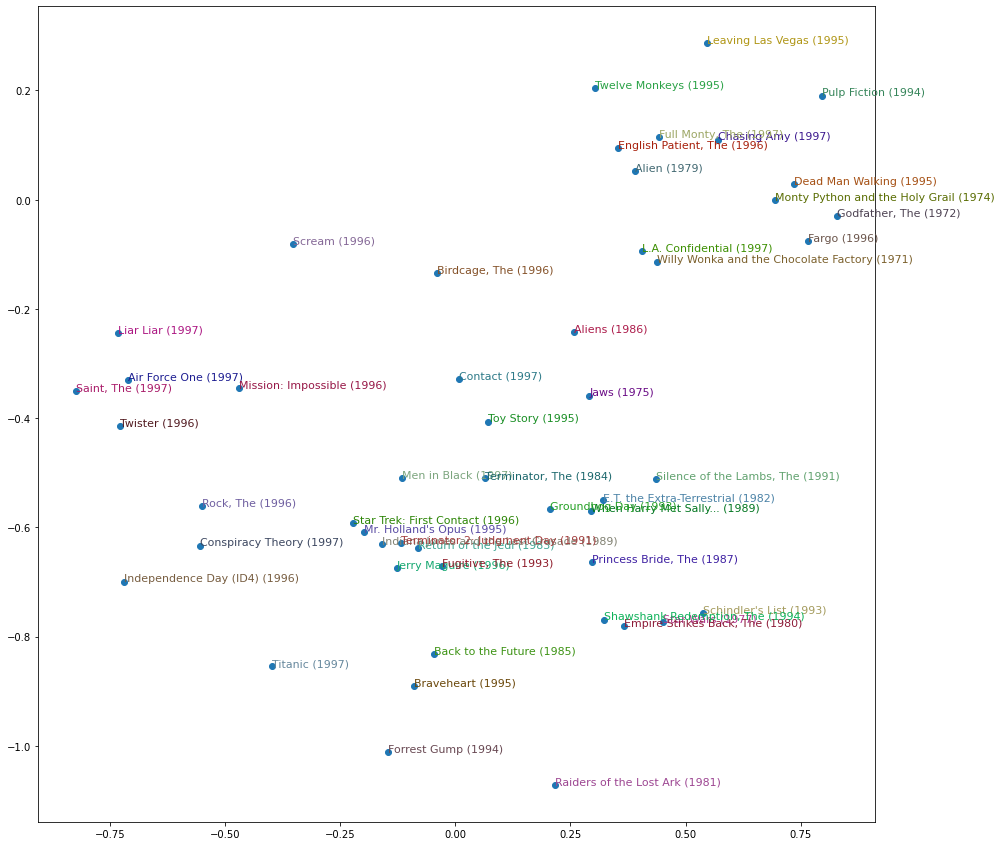

In [ ]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac1[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

###利用模型找到类似的电影来做推荐

即使是在我们上面所说的50维空间中，我们也可以计算出一个嵌入的近邻。如果有两部几乎相同的电影，那么它们的嵌入也必须是几乎相同的，因为喜欢它们的用户几乎完全相同。这里有一个更普遍的想法：电影的相似性可以由喜欢这些电影的用户的相似性来定义。而这直接意味着，两部电影嵌入的距离可以定义这种相似性。我们可以用这个来找到与*沉默的羔羊*最相似的5部电影。

这是一个强大的推荐技术。让我们在下面试试吧。也可以随意改变目标电影的名称（即*回到未来*），以找到最接近的邻居和可能的推荐给自己。

In [ ]:
movie_factors = learn.model.i_weight.weight
idx = dls.classes['title'].o2i['Back to the Future (1985)']
distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])
idx = distances.argsort(descending=True)[1:5]
dls.classes['title'][idx]

(#4) ['Raiders of the Lost Ark (1981)','Prefontaine (1997)','Field of Dreams (1989)','Speed (1994)']

让我们对另一部极受欢迎的科幻电影，如*《星球大战》（1977年）*进行同样的尝试。你可以看到，我们被推荐了其他属于《星球大战》宇宙的电影。

In [ ]:
movie_factors = learn.model.i_weight.weight
idx = dls.classes['title'].o2i['Star Wars (1977)']
distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])
idx = distances.argsort(descending=True)[1:5]
dls.classes['title'][idx]

(#4) ['Empire Strikes Back, The (1980)','Return of the Jedi (1983)','Raiders of the Lost Ark (1981)','Swingers (1996)']

我们现在建立了一个完整的协同过滤模型，并共同学习了潜在因素和嵌入。我们理解了它们的强大以及它们所能揭示的关系和模式。

你已经为建立你自己的协作过滤模型做好了充分准备。

# 你的成果，到了你在实践中应用理论的时间了

祝贺你读完这篇笔记，如果你对一些理论感到困惑，没有完全理解这里所讲的内容，也不用担心，因为你的实际学习是从这里开始的。

理想的阅读时间是在复习课之前，这样你就有一点时间来思考学习材料，找出阅读中最困惑和最难的内容，并在复习课上与导师讨论。复习课是为了让你弥补你目前对材料理解上的差距。

对于你的成果，你将不得不在一个单独的笔记本上工作。

---
*注：本笔记本改编自fastai的笔记本08_collab.ipynb。
简化为对协同学习的概述*。

##### 其他来源。
* https://towardsdatascience.com/introduction-to-recommender-systems-6c66cf15ada
*https://towardsdatascience.com/collaborative-filtering-using-fastai-a2ec5a2a4049
*https://towardsdatascience.com/introduction-to-latent-matrix-factorization-recommender-systems-8dfc63b94875
*https://towardsdatascience.com/evaluation-metrics-for-recommender-systems-df56c6611093
*https://towardsdatascience.com/deep-latent-variable-models-unravel-hidden-structures-a5df0fd32ae2
---

